In [1]:
#!pip install name
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape

(60, 2)

In [4]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [5]:
#area is independent feature, x
#rent is dept. y
x = df['area']
y = df['rent']

In [6]:
x.head(61)

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
29    3100
30    2100
31    2100
32    2500
33    2250
34    3000
35    1900
36    1500
37    1850
38    2700
39    2100
40    2150
41    2100
42    2100
43    2510
44    2250
45    3100
46    1800
47    1550
48    1800
49    2700
50    2110
51    2100
52    3500
53    1200
54    2800
55    3100
56    2750
57    1800
58    2200
59    3100
Name: area, dtype: int64

In [7]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# Least Square Method

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [9]:
mean_x

2289.0

In [10]:
df.area.mean()

2289.0

In [11]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

In [12]:
dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [13]:
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

# Equations

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

# slope

In [14]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 

In [15]:
m

21.292661473611954

In [16]:
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [17]:
df.tail(1)

,area,rent
59,3100,51600


# Intercept, c

In [18]:
c = mean_y - m*mean_x

In [19]:
c

-11469.7354464311

In [20]:
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 21.292661473611954
Intercept (c): -11469.7354464311


In [ ]:
new_x = float(input('Enter any value of area: '))
pred1 = m*new_x + c
print('predicted rent is: {rent}'.format(rent=pred1))

In [ ]:
31500 - 31115.58750079281

# SKlean

In [21]:
from sklearn.linear_model import LinearRegression 

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(df[['area']], y)

LinearRegression()

In [24]:
reg.coef_

array([21.29266147])

In [25]:
m

21.292661473611954

In [26]:
reg.intercept_

-11469.735446431114

In [27]:
c

-11469.7354464311

In [28]:
reg.predict([[2000]])

array([31115.58750079])

In [30]:
#pred1 # manual

# Foramal Work

Text(0.5, 1.0, 'area-rent visualization')

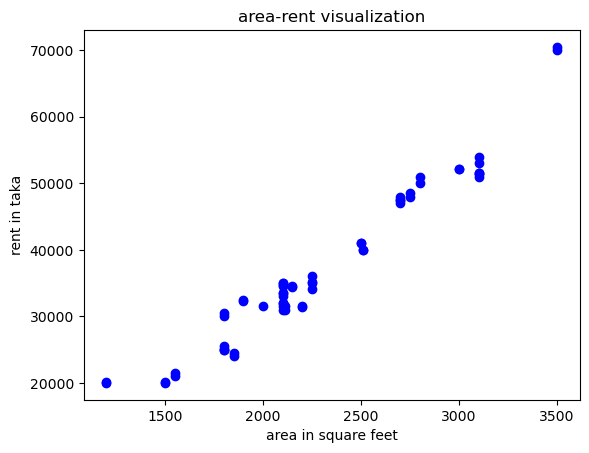

In [31]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')

# Data Split

In [32]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = df.drop('rent', axis=1) # 1 for col and 0 for rows ; df[['area']] 
y = df[['rent']]

In [35]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [36]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=.30)

In [38]:
xtrain.head() # 70% data

,area
3,2250
32,2500
36,1500
21,2100
47,1550


In [39]:
ytrain.head()

,rent
3,36100
32,41100
36,20200
21,33500
47,21500


In [40]:
xtest.head()

,area
12,2100
20,2110
1,2100
54,2800
18,1800


In [41]:
xtest.shape

(18, 1)

In [42]:
xtrain.shape


(42, 1)

In [43]:
reg.fit(xtrain, ytrain) # training ml model with train data

LinearRegression()

In [44]:
reg.predict(xtest) #input area and it will return predicted rent

array([[33140.14464424],
       [33345.95407145],
       [33140.14464424],
       [47546.80454893],
       [26965.86182794],
       [41578.33115984],
       [29023.95610004],
       [36227.28605238],
       [26965.86182794],
       [51662.99309313],
       [20791.57901164],
       [34169.19178029],
       [33140.14464424],
       [33140.14464424],
       [61953.46445362],
       [45488.71027683],
       [45488.71027683],
       [36227.28605238]])

In [45]:
ytest.head()

,rent
12,34500
20,31500
1,35000
54,51000
18,25000


In [46]:
ytest['predicted_y'] = reg.predict(xtest)

In [47]:
ytest.head()

,rent,predicted_y
12,34500,33140.144644
20,31500,33345.954071
1,35000,33140.144644
54,51000,47546.804549
18,25000,26965.861828


In [48]:
len(ytest)

18

In [49]:
ytest.drop('predicted_y', axis=1, inplace=True)

In [50]:
ytest.head()

,rent
12,34500
20,31500
1,35000
54,51000
18,25000


In [51]:
#training score
reg.score(xtrain, ytrain)

0.951265821878035

In [52]:
#testing accuracy
reg.score(xtest, ytest)

0.9422498417199829

# MSE & MAE

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
mse = mean_squared_error(ytest, reg.predict(xtest))

In [55]:
mse

7517933.874618626

In [56]:
mean_absolute_error(ytest, reg.predict(xtest))

2160.3669898905573

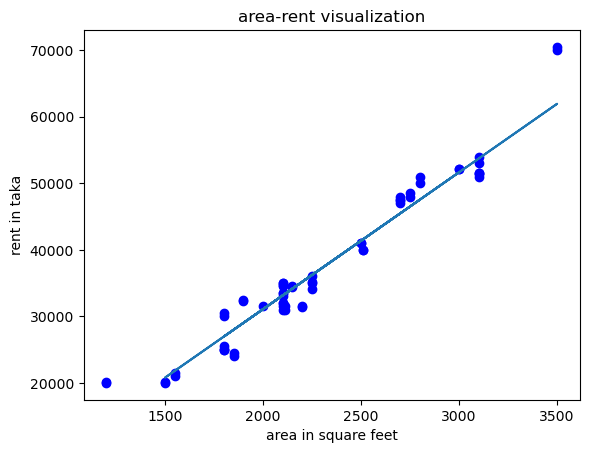

In [57]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest, reg.predict(xtest))

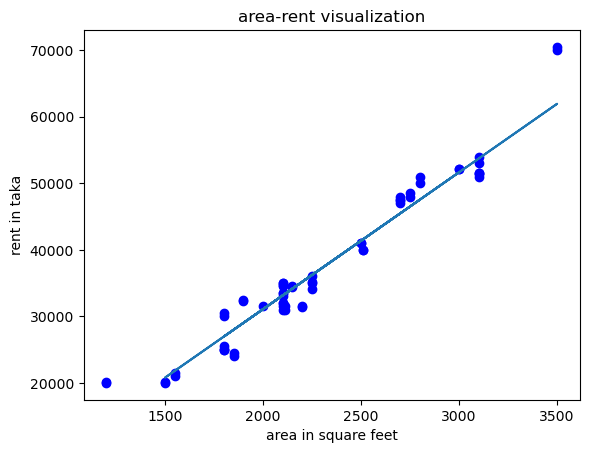

In [58]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest.squeeze(), reg.predict(xtest))

# Save ML model by pickle

In [59]:
import pickle as pk

In [60]:
pk.dump(reg,open('reg_khalil','wb'))

In [61]:
reg1=pk.load(open('reg_khalil','rb'))

In [62]:
reg1

LinearRegression()

In [63]:
reg1.predict([[34500]])#array([[699962.68880438]])

array([[699962.68880438]])

In [64]:
reg1.predict([[2510]])

array([[41578.33115984]])

# ML model save by joblib

In [65]:
import joblib as jb
jb.dump(reg,'reg_jb')

['reg_jb']

In [66]:
reg5=jb.load('reg_jb')

In [67]:
reg5

LinearRegression()

In [68]:
reg5.predict([[34500]])

array([[699962.68880438]])

# find curent working directiory

In [69]:
import os
os.getcwd()

'C:\\Users\\Khalil'